In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [62]:
dataset=pd.read_csv("Mall_Customers.csv")

In [63]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [64]:
x=dataset.iloc[:,[3,4]]

Text(0.5, 1.0, 'customer data')

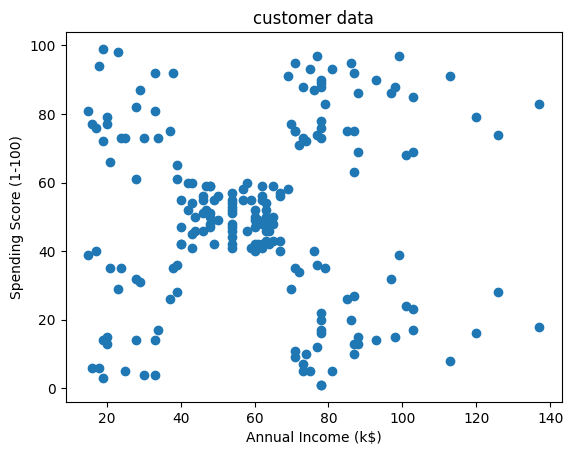

In [65]:
plot.scatter(dataset['Annual Income (k$)'],dataset["Spending Score (1-100)"])

plot.xlabel("Annual Income (k$)")
plot.ylabel('Spending Score (1-100)')
plot.title("customer data")

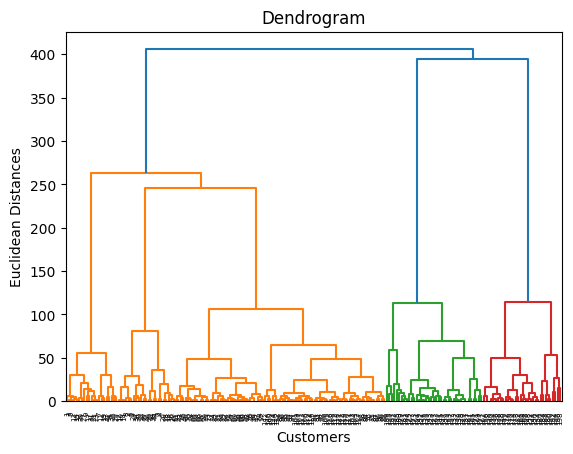

In [66]:
#Plot the hierarchical clustering as a dendrogram.
#The dendrogram illustrates how each cluster is
#composed by drawing a U-shaped link between a non-singleton
#cluster and its children. 
#The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters
#were merged. The length of the two legs of the U-link represents
#the distance between the child clusters.

import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))
plot.title('Dendrogram')
plot.xlabel('Customers')
plot.ylabel('Euclidean Distances')

plot.show()

# To find the no of clusters: look for largest distance vertically without cressing any horizindal lines...
   #blue line 250-400 (300,350) so no of clusters is 2

In [67]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5)
label=model.fit_predict(x)


In [68]:
#finding the silhouette score of input and model predicted output

from sklearn.metrics import silhouette_score
silhouette_score(x,label)

np.float64(0.5529945955148897)

In [69]:
supervised=pd.DataFrame(dataset)

In [70]:
supervised["cluster_group"]=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [71]:
supervised.to_csv("agglomerative.csv")

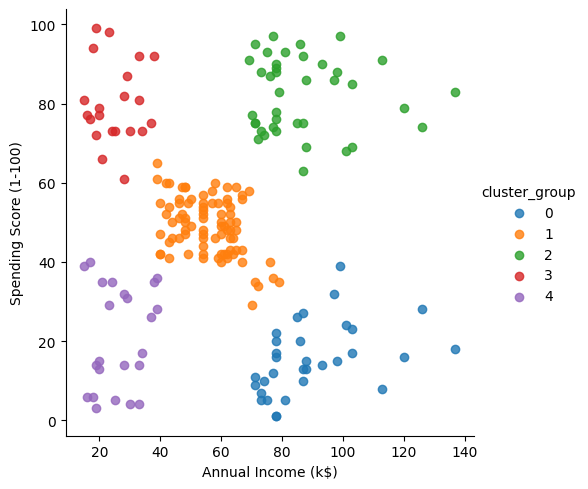

In [72]:
#plot the datapoints
import seaborn as sns
sns.lmplot(supervised, x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False)